In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

In [8]:
datasets = {
    "No encoded columns": "content/combined_data_none_encoded.csv",
    "No encoded columns except year, binned actor_age and actor gender": "content/combined_data_not_encoded.csv",
    "Encoding top 10 categories with over 50% represented": "content/combined_data_all_encoded_10.csv",
    "Encoding top 100 categories with over 50% represented": "content/combined_data_all_encoded_100.csv",
    "Encoding top 500 categories with over 50% represented": "content/combined_data_all_encoded_500.csv",
    "Encoding list top 10 categories": "content/combined_data_all_list_encoded_10.csv",
    "Encoding list top 100 categories": "content/combined_data_all_list_encoded_100.csv"
}

In [10]:
maes = []


df = pd.read_csv(datasets["Encoding list top 100 categories"])
print("\n" + fp)

y = df["weighted_average_vote"].astype(float)
df = df.drop(["weighted_average_vote"], axis=1)

if "imdb_title_id" in df.columns:
    X = df.drop(
        ["imdb_title_id", "title"],
        axis=1,
    ).astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

dim = X.shape[1]

# define the keras model
model = Sequential()
model.add(
    Dense(dim * 2, input_dim=dim, activation="relu", kernel_initializer="he_normal")
)
model.add(Dense(dim, activation="sigmoid", kernel_initializer="he_normal"))
model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])

hist = model.fit(
    X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test)
).history

yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
print("\n" + desc)

maes.append(hist)

print("MAE: %.3f\n" % error)


content/combined_data_all_list_encoded_10.csv
Epoch 1/10
74/74 [==============================] - 1s 8ms/step - loss: 3.6366 - mse: 3.6366 - mae: 1.3328 - val_loss: 1.1181 - val_mse: 1.1181 - val_mae: 0.8071
Epoch 2/10
74/74 [==============================] - 0s 6ms/step - loss: 1.0096 - mse: 1.0096 - mae: 0.7739 - val_loss: 1.0185 - val_mse: 1.0185 - val_mae: 0.7619
Epoch 3/10
74/74 [==============================] - 0s 6ms/step - loss: 0.9157 - mse: 0.9157 - mae: 0.7361 - val_loss: 0.9894 - val_mse: 0.9894 - val_mae: 0.7465
Epoch 4/10
74/74 [==============================] - 0s 5ms/step - loss: 0.8609 - mse: 0.8609 - mae: 0.7132 - val_loss: 0.9655 - val_mse: 0.9655 - val_mae: 0.7436
Epoch 5/10
74/74 [==============================] - 0s 5ms/step - loss: 0.8216 - mse: 0.8216 - mae: 0.6966 - val_loss: 0.9582 - val_mse: 0.9582 - val_mae: 0.7412
Epoch 6/10
74/74 [==============================] - 0s 6ms/step - loss: 0.7798 - mse: 0.7798 - mae: 0.6782 - val_loss: 0.9571 - val_mse: 0.9571

file: none encoded - MAE: 0.751


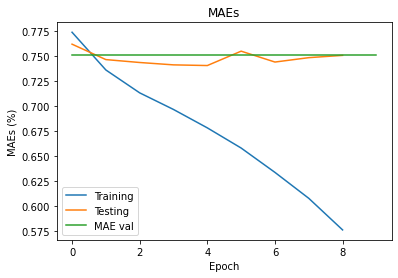

In [13]:
from matplotlib.ticker import FormatStrFormatter

plt.title("MAEs")

mae_val = hist["val_mae"][9]

plt.plot(hist["mae"][1:])
plt.plot(hist["val_mae"][1:])
plt.plot([mae_val for i in range(10)])
plt.legend(["Training", "Testing", "MAE val"])
plt.ylabel("MAEs (%)")
plt.xlabel("Epoch")

print(f"file: {titles[i]} - MAE: {mae_val:.3f}")

plt.savefig("datasetMAEs.png" ,bbox_inches="tight", facecolor="white")
plt.show()

In [ ]:
mae_vals = [h["val_mae"][9] for h in maes]

plt.scatter(
    titles,
    mae_vals
)
plt.grid(b=True, axis="y")
plt.xlabel("Datasets")
plt.ylabel("MAE values")
plt.gcf().set_size_inches(8, 5, forward=True)